## Balansiranje

In [173]:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # Python plotting

# Set the style for your plots
plt.style.use('default')  # Use the default style from your environment
plt.rc('font', family='serif', size=10)
plt.rcParams['text.usetex'] = False

from scipy import signal
from scipy.fft import fft, fftshift

import numpy as np
import scipy.signal as signal


def open_txt_file(filename, n=8, m=3):
    '''the file itself has a header of n lines and than m number of colums. This function returns and array of m columns'''
    
    column1_data = []
    column2_data = []
    
    with open(filename, 'r') as file:

        # Skip the first n lines (header)
        for _ in range(n):
            next(file)

        # Read the remaining lines and extract data from the columns
        for line in file:
            columns = line.strip().split()
            if len(columns) == 2:
                column1_data.append(float(columns[0].strip()))
                column2_data.append(float(columns[1].strip()))
    
    return [np.array(column1_data), np.array(column2_data)]


def add_noise_to_signal(signal, noise_amplitude):
    noise = np.random.normal(scale=noise_amplitude, size=len(signal))
    return signal + noise



In [174]:
data = open_txt_file('meritve2/run3_0708.txt')
data[0][:10]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

### Referenčni kot

(0.0, 0.2)

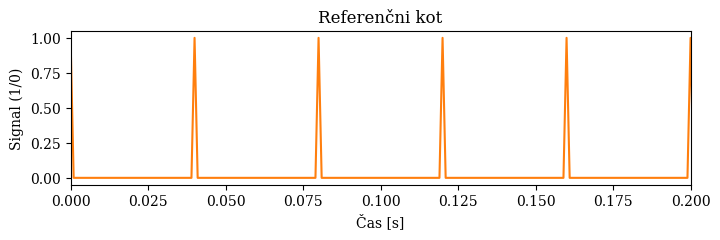

In [175]:
# Referenčni kot

ref = np.zeros(1001)
for i in np.arange(25):
    ref[40*i] = 1
t = np.linspace(0, 1, 1001)
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(t, ref, 'C1', label='Referenčni kot')
ax.set_title('Referenčni kot')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Signal (1/0)')
ax.set_xlim(0, 0.2)

# plt.savefig('Referenčni_kot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Referenčni_kot.jpg', dpi=300, bbox_inches='tight')


### Debalans

In [176]:
filename = 'meritve2/run3_0708.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

def print_data(data, Title, y1=-42, y2=42, oznaka='izmerjen signal'):
    '''data ima obliko [t, F1, F2]'''
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle(Title, fontsize=16)
    ax.plot(data[0], data[1], label=oznaka)
    ax.set_xlabel('Čas [s]')
    ax.set_ylabel('Sila na ležaju [N]')
    ax.set_ylim(y1, y2)
    ax.grid()
    ax.legend(loc='lower right');

data_debalans = open_txt_file(filename)
data_debalans[1] = data_debalans[1] - np.mean(data_debalans[1])
# print_data(data_debalans, Title='Debalansiranje', y1=-15, y2=15)


#### Dodan šum

In [177]:
noise_amplitude = 1.2;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_debalans_noise = data_debalans.copy()
data_debalans_noise[1] = data_debalans[1] + noise

# print_data(data_debalans_noise, Title='Meritev debalans', y1=-15, y2=15)

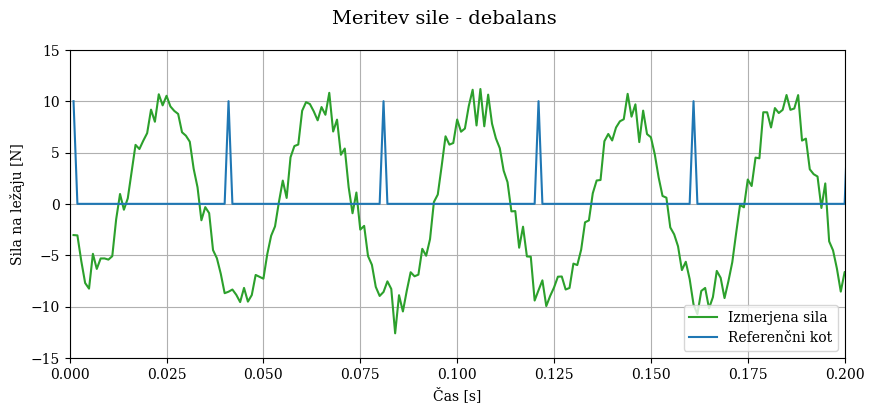

In [178]:
t = t[:1000]
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Meritev sile - debalans', fontsize=14)
ax.plot(t, data_debalans_noise[1], 'C2', label='Izmerjena sila')#, label='Sila na ležaju')
ax.plot(t, 10*ref[:1000], label=f'Referenčni kot')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 15)
ax.grid()
ax.legend(loc='lower right');

# plt.savefig('Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')

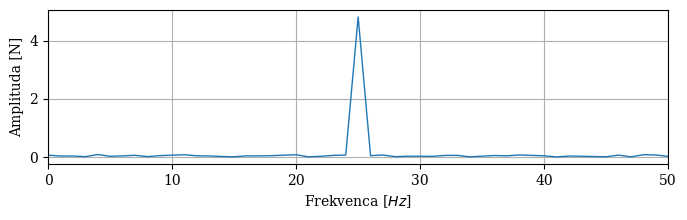

In [179]:
def Fourier(data, frekvenca=25):
    dt = data[0][1] - data[0][0]
    custom_ticks = [frekvenca - 5, frekvenca, frekvenca + 5]
    freq = np.fft.rfftfreq(len(data[0]), dt)
    Fourier_data = np.fft.rfft(data[1], norm="forward");

    fig, ax = plt.subplots(1, 1, figsize=(8, 2))
    
    # ax.set_xticks(custom_ticks)
    ax.plot(freq, np.abs(Fourier_data), color="C0", linewidth=1)
    # ax.set_title("Frekvenčni spekter začetnega stanja")
    ax.set_xlim(0, 50)
    ax.set_xlabel(r"Frekvenca [$Hz$]")
    ax.set_ylabel("Amplituda [N]")
    ax.grid()
    # freq
Fourier(data_debalans_noise)
#savefig as jpg
# plt.savefig('Frekvenčni_spekter_začetnega_stanja_2.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Frekvenčni_spekter_začetnega_stanja_2.jpg', dpi=300, bbox_inches='tight')

In [180]:
# freq_F = 6;
# sos = signal.butter(3, [0.95*freq_F, 1.05*freq_F], 'bandpass', fs=1001, output='sos')
# filtriran_debalans = data_debalans.copy()
# filtriran_debalans[1] = signal.sosfiltfilt(sos, data_debalans_noise[1])#*np.hanning(len(Time)))
# filtriran_debalans[2] = signal.sosfiltfilt(sos, data_debalans_noise[2]*np.hanning(len(Time)))

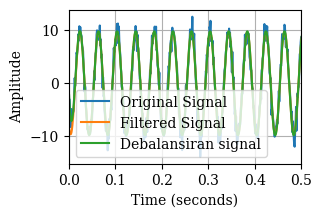

In [181]:
def filtriranje(t, original_signal, sampling_rate=1000, freq=25):
    # Step 1: Compute the FFT of the original signal
    low_cutoff_freq = freq - 0.3
    high_cutoff_freq = freq + 0.3
    fft_signal = np.fft.fft(original_signal)

    # Step 2: Apply a frequency-domain filter (e.g., zero out frequencies outside a specific range)
    # Design the frequency domain filter (e.g., band-pass filter)
    freq_range = (low_cutoff_freq, high_cutoff_freq)
    filtered_fft_signal = np.copy(fft_signal)
    freqs = np.fft.fftfreq(len(fft_signal), d=1/sampling_rate)
    filtered_fft_signal[(freqs < freq_range[0]) | (freqs > freq_range[1])] = 0

    # Step 3: Compute the Inverse FFT to get the filtered signal in the time domain
    filtered_signal = 2*np.fft.ifft(filtered_fft_signal)
    return filtered_signal

filtered_signal = filtriranje(t=t, original_signal=data_debalans_noise[1], freq=25)
# Plot the original and filtered signals
plt.figure(figsize=(3, 2))
plt.plot(t, data_debalans_noise[1], label='Original Signal')
plt.plot(t, filtered_signal.real, label='Filtered Signal')
plt.plot(t, data_debalans[1], label='Debalansiran signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.legend()
plt.grid(True)
plt.show()



In [182]:
peaks_prikaz, _ = signal.find_peaks(filtered_signal.real, height=6)



## test

In [183]:
# t = t[:1000]
# fig, ax = plt.subplots(figsize=(10, 4))
# fig.suptitle('Meritev sile - debalans', fontsize=14)
# ax.plot(t, data_debalans_noise[1], 'C2', label='Izmerjena sila')#, label='Sila na ležaju')
# plt.plot(t, filtered_signal.real, label='Filtered Signal')
# ax.plot(t, 10*ref[:1000], label=f'Referenčna lega')

# first_peak_index = peak1

# ax.plot(first_peak_index, filtered_signal[first_peak_index], 'ro', label='First Peak > 6')
# ax.annotate(f'First Peak: {filtered_signal[first_peak_index]}', xy=(first_peak_index, 0),
#              xytext=(first_peak_index, -3), textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", color='black'))


# ax.set_xlabel('Čas [s]')
# ax.set_ylabel('Sila na ležaju [N]')
# ax.set_xlim(0, 0.2)
# ax.set_ylim(-15, 15)
# ax.grid()
# ax.legend(loc='lower right');

# # plt.savefig('Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')
# # plt.savefig('C:/Users/marko/Desktop/Adams/slike/Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')

Faza = 103 - 80 / 40 = 207.0°
First peak index: 23
First peak value: 9.61661834510331


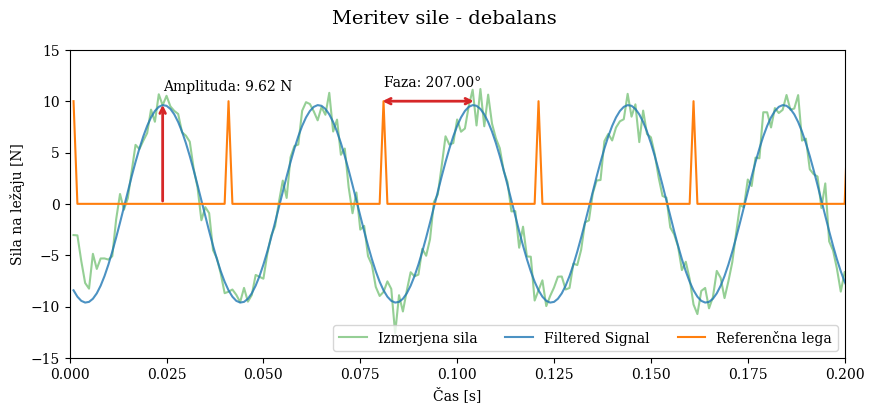

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined t, data_debalans_noise, filtered_signal, and peak1

t = t[:1000]
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Meritev sile - debalans', fontsize=14)

ax.plot(t, data_debalans_noise[1], 'C2', alpha = 0.5, label='Izmerjena sila')
ax.plot(t, filtered_signal.real, alpha = 0.8, label='Filtered Signal')
ax.plot(t, 10 * ref[:1000], label=f'Referenčna lega')

## Amplituda
annotation_text = f'Amplituda: {filtered_signal[peaks_prikaz[0]].real:.2f} N'
ax.annotate(annotation_text, xy=(t[peaks_prikaz[0]], filtered_signal[peaks_prikaz[0]].real),
             xytext=(0, 10), textcoords='offset points')

ax.annotate("", xy=(t[peaks_prikaz[0]], filtered_signal[peaks_prikaz[0]].real + 0.3),
             xytext=(t[peaks_prikaz[0]], 0), arrowprops=dict(arrowstyle="->", color='C3', linewidth=2))

## Faza

ref_index = 80
ax.plot(t[ref_index], 10, color='C5')
ax.plot(t[peaks_prikaz[2]], 10, color='C5')

Faza = ((peaks_prikaz[2] - ref_index)/40 * 360)

print(f'Faza = {peaks_prikaz[2]} - {ref_index} / 40 = {Faza:.1f}°')

annotation_text_faza = f'Faza: {Faza:.2f}°'
ax.annotate(annotation_text_faza, xy=(t[ref_index], 10),
             xytext=(0, 10), textcoords='offset points')

ax.annotate("", xy=(t[ref_index - 1], 10),
             xytext=(t[peaks_prikaz[2] + 1], 10), arrowprops=dict(arrowstyle="<->", color='C3', linewidth=2))

####

ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 15)
# ax.grid()
ax.legend(loc='lower right', ncol = 3);
print(f'First peak index: {first_peak_index}')
print(f'First peak value: {filtered_signal[first_peak_index].real}')

In [185]:
# for i in np.arange(len(t)):
#     if ref[i] != 0:
#         print(i)

## test end

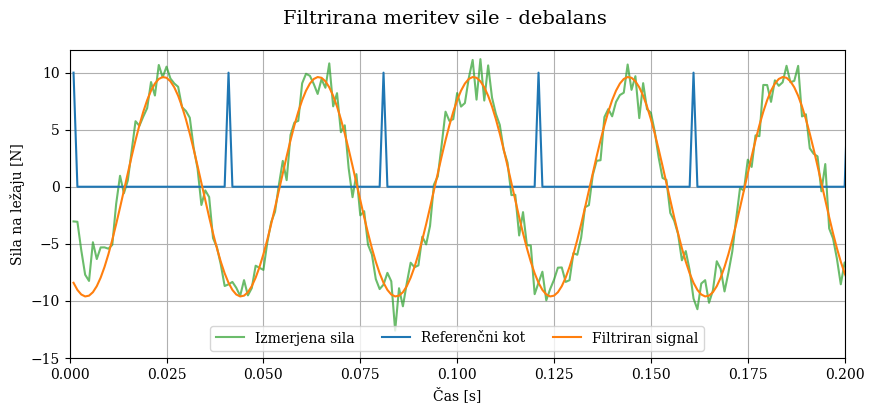

In [186]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Filtrirana meritev sile - debalans', fontsize=14)
ax.plot(t, data_debalans_noise[1], alpha=0.7, color='C2', label='Izmerjena sila')
ax.plot(t, 10*ref[:1000], label='Referenčni kot')
plt.plot(t, filtered_signal.real, label='Filtriran signal')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 12)
ax.grid()
ax.legend(loc='lower center', ncol = 3);

# plt.savefig('Filtrirana_meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Filtrirana_meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')


In [187]:
# 1000/20.8333333332

Peaks found at indices: [ 23  63 103 143 183 223 263 303 343 383 423 463 503 543 583 623 663 703
 743 783 823 863 903 943 983]
Amplituda debalans = 9.617 N
Faza debalans = 207.000 stopinj


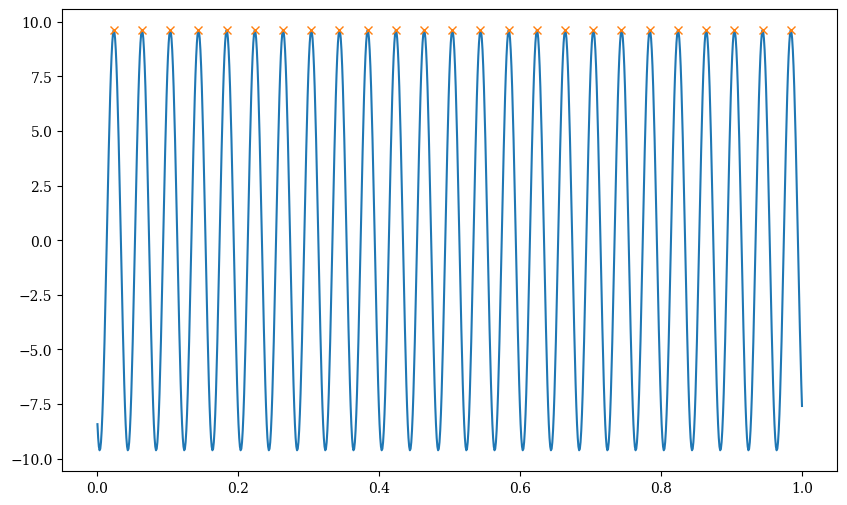

In [188]:
frekvenca_vrtenja = 25
deljenec = 40

def find_and_print_peaks(signal_array, h=10):
    peaks, _ = signal.find_peaks(signal_array, height=(h-4, h+4))
    print("Peaks found at indices:", peaks)
    return peaks

# peaks_debalans = find_and_print_peaks(data_debalans[1], h=10)
peaks_filtered = find_and_print_peaks(filtered_signal.real, h=10)

def amplitude_and_phase(signal_array, peaks, deljenec=62):
    amplitude = max(np.abs(signal_array[peaks]))
    dif = []
    for i in np.arange(len(peaks)-1):
        dif.append(peaks[i+1]-peaks[i])
    phase = peaks[4]%(deljenec)/np.average(dif) * 360
    print(f'Amplituda debalans = {amplitude:.3f} N')
    print(f'Faza debalans = {phase:.3f} stopinj')
    return amplitude, phase

A_u, phase_u = amplitude_and_phase(filtered_signal.real, peaks_filtered, deljenec=40)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t, filtered_signal.real, label='Filtered Signal')
# ax.plot(t[peaks_debalans], data_debalans[1][peaks_debalans], 'x', label='Detected Peaks_original')
ax.plot(t[peaks_filtered], filtered_signal[peaks_filtered].real, 'x', label='Detected Peaks_filtered')



### Testna masa

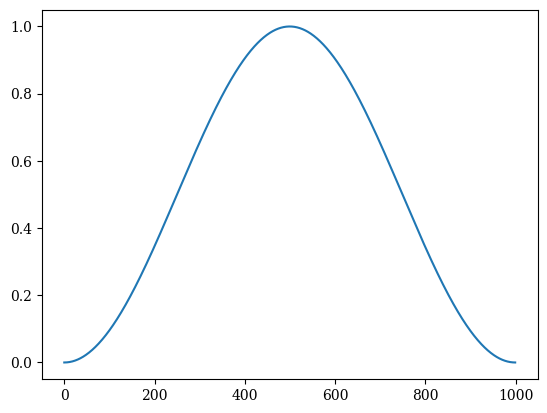

In [189]:
window = signal.windows.hann(1000)
plt.plot(window)

In [190]:
filename = 'meritve2/run4_0708.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

data_test = open_txt_file(filename)
data_test[1] = data_test[1] - np.mean(data_test[1][50:])
data_test[1] = data_test[1] #*window
# print_data(data_test, Title='test', y1=-30, y2=30)

In [191]:
noise_amplitude = 0.5;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_test_noise = data_test.copy()
data_test_noise[1] = data_test[1] + noise

# print_data(data_test_noise, Title='Test z dodanim šumom', y1=-30, y2=30)

In [192]:
# Fourier(data_test_noise, frekvenca=25)

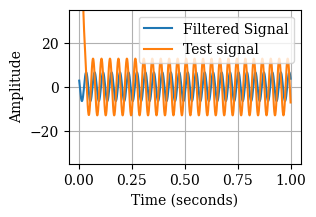

6.515177514306755


In [193]:
filtered_signal_test = 2*filtriranje(t=t, original_signal=data_test_noise[1], freq=25)
# Plot the original and filtered signals
plt.figure(figsize=(3, 2))
# plt.plot(t, data_test_noise[1], label='Original Signal')
plt.plot(t, filtered_signal_test.real, label='Filtered Signal')
plt.plot(t, data_test[1], label='Test signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.ylim([-35, 35])
plt.legend()
plt.grid(True)
plt.show()
print(max(filtered_signal_test.real))

In [194]:
# def find_and_print_peaks(signal_array, min_peak_distance=50):
#     peaks, _ = signal.find_peaks(data_test[1], distance=min_peak_distance)
#     # print("Peaks found at indices:", peaks)
#     return peaks

# peaks_test = find_and_print_peaks(data_test[1], h=13)
peaks_test1 = find_and_print_peaks(data_test[1], h=13)

# def amplitude_and_phase(signal_array, peaks):
#     amplitude = np.average(np.abs(signal_array[peaks]))
#     dif = []
#     for i in np.arange(len(peaks)-1):
#         dif.append(peaks[i+1]-peaks[i])
#     phase = peaks[0]/np.average(dif) * 360
#     print(f'Amplituda debalans = {amplitude:.3f} N')
#     print(f'Faza debalans = {phase:.3f} stopinj')
#     return amplitude, phase

# A_uw, phase_uw = amplitude_and_phase(data_test[1], peaks_test, deljenec=40)
A_uw, phase_uw = amplitude_and_phase(data_test[1], peaks_test1, deljenec=40)

Peaks found at indices: [ 65 105 145 185 225 265 305 345 385 425 465 505 545 585 625 665 705 745
 785 825 865 905 945 985]
Amplituda debalans = 12.782 N
Faza debalans = 225.000 stopinj


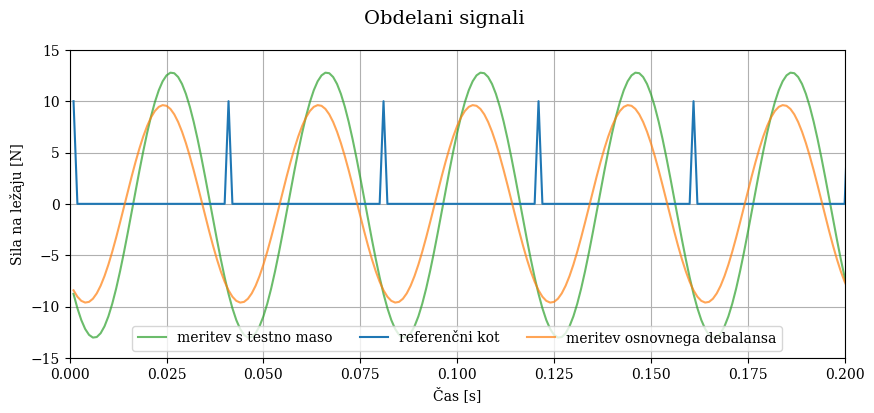

In [195]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Obdelani signali', fontsize=14)
ax.plot(t[:800], data_test[1][200:], alpha=0.7, color='C2', label='meritev s testno maso')
ax.plot(t[:800], 10*ref[:800], label='referenčni kot')
plt.plot(t[:800], filtered_signal.real[200:], alpha=0.7 ,label='meritev osnovnega debalansa')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 15)
ax.grid()
ax.legend(loc='lower center', ncol = 3);

# plt.savefig('Obdelani_-_signali.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Obdelani_-_signali.jpg', dpi=300, bbox_inches='tight')

In [196]:
print(f'phase_u = {phase_u:.2f}°')
print(f'phase_uw = {phase_uw:.2f}°')
print(f'A_u = {A_u:.2f} N')
print(f'A_uw = {A_uw:.2f} N')

phase_u = 207.00°
phase_uw = 225.00°
A_u = 9.62 N
A_uw = 12.78 N


### Izračun korekcije

${A_w}^2 = {A_{v+w}}^2 + {A_v}^2 - 2 A_v A_{v+w} \cdot cos(\alpha)$

In [197]:
A_w = np.sqrt(A_u**2 + A_uw**2 - 2*A_u*A_uw*np.cos(np.deg2rad(phase_u - phase_uw)))
alpha = np.rad2deg(np.arccos((A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w)))

print('A_u = {:.2f} N'.format(A_u))
print('A_uw = {:.2f} N'.format(A_uw))
print('A_w = {:.2f} N'.format(A_w))
print('alpha = {:.2f} deg'.format(alpha))

A_u = 9.62 N
A_uw = 12.78 N
A_w = 4.70 N
alpha = 122.74 deg


In [198]:
# Masa
m_w = 0.005
m_0 = np.abs(A_u)/np.abs(A_w) * m_w

print(f'm_0 = {m_0:.6f} kg')

m_0 = 0.010239 kg


### Polarni diagrami

In [199]:
print(f'A_u = {A_u:.3f} N')
print(f'A_uw = {A_uw:.3f} N')
print(f'A_w = {A_w:.3f} N')
print(f'phase_u = {phase_u:.3f} deg')
print(f'phase_uw = {phase_uw:.3f} deg')

A_u = 9.617 N
A_uw = 12.782 N
A_w = 4.696 N
phase_u = 207.000 deg
phase_uw = 225.000 deg


amplitude_vector3 = 4.70
A_w = 4.70


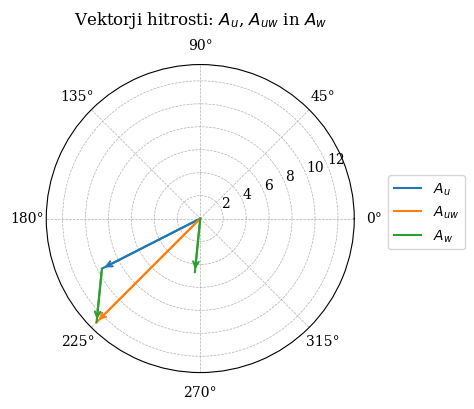

In [200]:

phase_u_rad = np.deg2rad(phase_u)  # Convert phase from degrees to radians
phase_uw_rad = np.deg2rad(phase_uw)  # Convert phase from degrees to radians


# Convert polar coordinates to Cartesian coordinates
x_vector1 = A_u * np.cos(phase_u_rad)
y_vector1 = A_u * np.sin(phase_u_rad)

x_vector2 = A_uw * np.cos(phase_uw_rad)
y_vector2 = A_uw * np.sin(phase_uw_rad)

x_vector3 = x_vector2 - x_vector1
y_vector3 = y_vector2 - y_vector1

# Compute the amplitude and phase of the new vector
amplitude_vector3 = np.sqrt(x_vector3**2 + y_vector3**2)
phase_vector3 = np.arctan2(y_vector3, x_vector3)

# Convert the phase of the new vector to degrees
phase_vector3_degrees = np.rad2deg(phase_vector3)

print(f'amplitude_vector3 = {amplitude_vector3:.2f}')
print(f'A_w = {A_w:.2f}')


# Plot the polar diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 4))

# Add arrows for Vector 1
ax.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

title = r'Vektorji hitrosti: $A_u$, $A_{uw}$ in $A_w$'
ax.legend(loc=(1.11, 0.40))
ax.set_title(title, pad=10)
# ax.set_thetalim(0, np.pi / 2)
ax.grid(True, linestyle='--', linewidth=0.5)
# plt.savefig('Vektorji_hitrosti.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Vektorji_hitrosti.jpg', dpi=300, bbox_inches='tight')

AttributeError: 'PolarAxes' object has no attribute 'set_thetaticks'

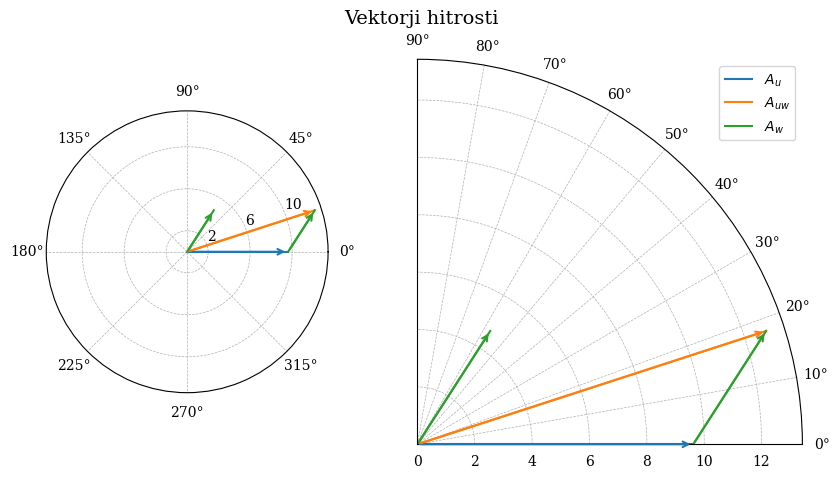

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), subplot_kw={'projection': 'polar'}, gridspec_kw={'width_ratios': [2, 3]})


fig.suptitle('Vektorji hitrosti', fontsize=14)

## Plot 1
ax1.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax1.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax1.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax1.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax1.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax1.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax1.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax1.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

# title = r'Vektorji hitrosti: $A_u$, $A_{uw}$ in $A_w$'
# ax1.legend(loc=(1.11, 0.40))
# ax1.set_title(title, pad=10)
# ax1.set_thetalim(0, np.pi / 2)
ax1.grid(True, linestyle='--', linewidth=0.5)


phase_uw_rad = phase_uw_rad - phase_u_rad
phase_vector3 = phase_vector3 - phase_u_rad
phase_u_rad = 0

## Plot 2

ax2.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax2.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax2.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax2.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax2.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax2.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax2.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax2.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

ax2.legend(loc='upper right') # , ncol=2)
# ax2.set_title('Polar Diagram with Arrows', loc='right', pad=20)
ax2.set_thetalim(0, np.pi / 2)
ax2.grid(True, linestyle='--', linewidth=0.5)

ax1.set_rticks([2, 6, 10]);


# plt.savefig('Vektorji_hitrosti.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Vektorji_hitrosti.jpg', dpi=300, bbox_inches='tight')


Text(0.15707963267948988, 6.719582017215203, '$\\alpha = 18.0^\\circ$')

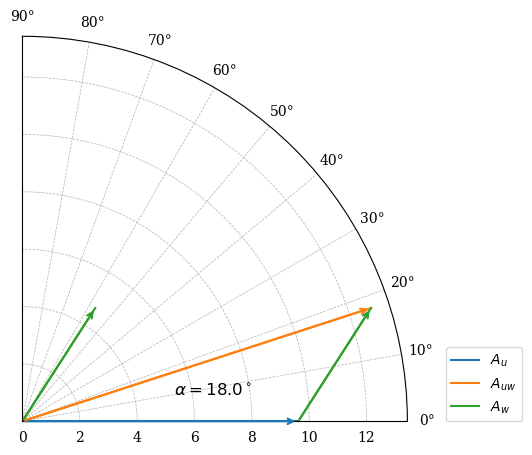

In [202]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))

# Add arrows for Vector 1
ax.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

ax.legend(loc=(1.1, 0)) # , ncol=2)
# ax.set_title('Polar Diagram with Arrows', loc='right', pad=20)
ax.set_thetalim(0, np.pi / 2)
ax.grid(True, linestyle='--', linewidth=0.5)

ax.text((phase_u_rad + phase_uw_rad) / 2, 0.6 * (A_u + A_uw) / 2,
        fr"$\alpha = {np.rad2deg(phase_uw_rad):.1f}^\circ$", ha='center', va='center', fontsize=12, color='black')

# plt.savefig('Vektorji_hitrosti_2.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Vektorji_hitrosti_2.jpg', dpi=300, bbox_inches='tight')

In [203]:
print(f'A_u = {A_u:.3f} N')
print(f'phase_u = {phase_u:.3f} deg')
print()
print(f'A_uw = {A_uw:.3f} N')
print(f'phase_uw = {phase_uw:.3f} deg')
print()
print(f'A_w = {A_w:.3f} N')
# print(f'phase_vector3 = {phase_vector3:.3f} deg')
print()
print(f'm_0 = {m_0:.4f} kg')
print(f'alpha = {alpha:.3f} deg')

A_u = 9.617 N
phase_u = 207.000 deg

A_uw = 12.782 N
phase_uw = 225.000 deg

A_w = 4.696 N

m_0 = 0.0102 kg
alpha = 122.741 deg


#### Test prikaz

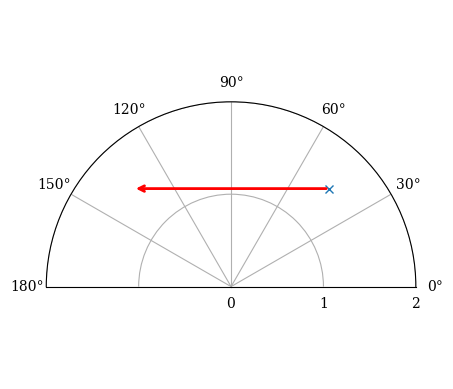

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Example angle and magnitude for the vector
theta = np.radians(45)  # Angle in radians
r = 1.5  # Magnitude of the vector

# Plot the data point
ax.plot(theta, r, 'C0x', lw=2)

# Calculate the position of the arrow's tail and head points
arrow_tail = [theta, r]
arrow_head = [np.radians(135), r]

# # Add the curved arrow annotation
ax.annotate("", xy=arrow_head, xytext=arrow_tail,
            arrowprops=dict(arrowstyle="->", color='red', lw=2))

# # Customize the polar plot appearance
ax.set_rticks([0, 1, 2])  # Hide radial tick labels
ax.set_thetamin(0)  # Set the minimum theta value
ax.set_thetamax(180)  # Set the maximum theta value
# ax.grid(True);


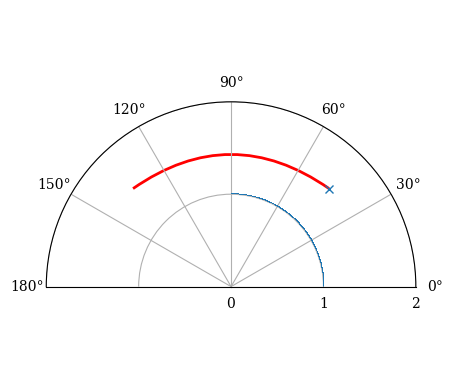

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Example angle and magnitude for the vector
theta = np.radians(45)  # Angle in radians
r = 1.5  # Magnitude of the vector

# Plot the data point
ax.plot(theta, r, 'C0x', lw=2)

# Calculate the position of the arrow's tail and head points
arrow_tail = [theta, r]
arrow_head = [np.radians(135), r]

# Create a curved path using Path
control_point = [(theta + arrow_head[0]) / 2, r * 1.2]
curve_path = Path([arrow_tail, control_point, arrow_head], [Path.MOVETO, Path.CURVE3, Path.CURVE3])

# Add the curved arrow annotation using the path
arrow_patch = PathPatch(curve_path, facecolor='none', edgecolor='red', lw=2)
ax.add_patch(arrow_patch)

# Annotate the arrow head
ax.annotate("", xy=arrow_head, xytext=arrow_tail,
            arrowprops=dict(arrowstyle='<->', color='none'))

k = 1000
for i in np.arange(k):
    ax.plot(i/k *np.radians(90), 1, 'C0', marker=",")

# Customize the polar plot appearance
ax.set_rticks([0, 1, 2])  # Hide radial tick labels
ax.set_thetamin(0)  # Set the minimum theta value
ax.set_thetamax(180)  # Set the maximum theta value

plt.show()  # Display the polar plot
